In [1]:
s3_tests = []
for m in ["0", "21","42", "63", "84", "105", "126", "147", "168"]:
    for i in ["00", "01", "02", "03", "04"]:
        s3_tests.append(f"s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-{m}-{i}-202211142035/202211191630/chemprot_abstract_test.json.json")


In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix):
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
   

    name = s3_prefix
    r = re.search(  "predictions_chemprot-adverserial-train-(\d+)-(\d+)-(\d+)", s3_prefix)
    name= s3_prefix
    train_size= int(r.group(1))
    train_pos_size= int(r.group(2))
    train_adverserial_neg= int(r.group(3))
    total_predictions= len(df)

    p,r,f,s = precision_recall_fscore_support(df["label"], 
                         df["prediction"], pos_label = 1, average="binary")
        
    return { "Name": name, 
                    "Precision":p,
                    "Recall":r,
                    "F1":f,  
                  #  "Threshold": "HighConfidence", 
                    "Support": s, 
                        "TrainSize":train_size, "TrainSizePositive": train_pos_size,
                        "TrainAdverserialNegative" : train_adverserial_neg,
                        "TrainAdverserialNegativeRate" : train_adverserial_neg/train_pos_size,
                        "PredictionsSize": total_predictions}
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s) for s in s3_prefixes]
    return pd.DataFrame(result)



In [5]:
df_stats = create_dfs_from_prefixes(s3_tests)
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize
0,s3://aegovan-data/chemprot_adverserial/predict...,0.253292,0.490255,0.334014,None,767,210,0,0.0,5744
1,s3://aegovan-data/chemprot_adverserial/predict...,0.260788,0.625187,0.368049,None,767,210,0,0.0,5744
2,s3://aegovan-data/chemprot_adverserial/predict...,0.272300,0.608696,0.376274,None,767,210,0,0.0,5744
3,s3://aegovan-data/chemprot_adverserial/predict...,0.371298,0.733133,0.492944,None,767,210,0,0.0,5744
4,s3://aegovan-data/chemprot_adverserial/predict...,0.284902,0.676162,0.400889,None,767,210,0,0.0,5744
5,s3://aegovan-data/chemprot_adverserial/predict...,0.404586,0.740630,0.523305,None,767,210,21,0.1,5744
6,s3://aegovan-data/chemprot_adverserial/predict...,0.239609,0.440780,0.310454,None,767,210,21,0.1,5744
7,s3://aegovan-data/chemprot_adverserial/predict...,0.280161,0.626687,0.387216,None,767,210,21,0.1,5744
8,s3://aegovan-data/chemprot_adverserial/predict...,0.317995,0.580210,0.410828,None,767,210,21,0.1,5744
9,s3://aegovan-data/chemprot_adverserial/predict...,0.326253,0.575712,0.416486,None,767,210,21,0.1,5744


In [6]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize
0,s3://aegovan-data/chemprot_adverserial/predict...,0.253292,0.490255,0.334014,None,767,210,0,0.0,5744
1,s3://aegovan-data/chemprot_adverserial/predict...,0.260788,0.625187,0.368049,None,767,210,0,0.0,5744
2,s3://aegovan-data/chemprot_adverserial/predict...,0.272300,0.608696,0.376274,None,767,210,0,0.0,5744
3,s3://aegovan-data/chemprot_adverserial/predict...,0.371298,0.733133,0.492944,None,767,210,0,0.0,5744
4,s3://aegovan-data/chemprot_adverserial/predict...,0.284902,0.676162,0.400889,None,767,210,0,0.0,5744
5,s3://aegovan-data/chemprot_adverserial/predict...,0.404586,0.740630,0.523305,None,767,210,21,0.1,5744
6,s3://aegovan-data/chemprot_adverserial/predict...,0.239609,0.440780,0.310454,None,767,210,21,0.1,5744
7,s3://aegovan-data/chemprot_adverserial/predict...,0.280161,0.626687,0.387216,None,767,210,21,0.1,5744
8,s3://aegovan-data/chemprot_adverserial/predict...,0.317995,0.580210,0.410828,None,767,210,21,0.1,5744
9,s3://aegovan-data/chemprot_adverserial/predict...,0.326253,0.575712,0.416486,None,767,210,21,0.1,5744


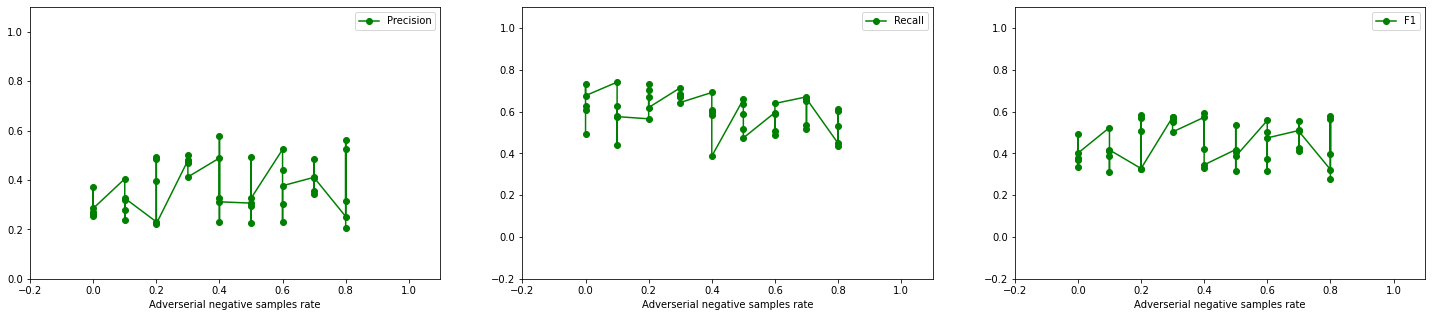

In [7]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAdverserialNegativeRate" : "Adverserial negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }

        df[["Precision", "TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(-0.2, 1.1), ax=ax[0], color=(my_colors))

        df[["Recall","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[1], color=(my_colors))

        df[["F1","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[2], color=(my_colors))

       
        plt.legend()

plot_comparison(df_stats)   

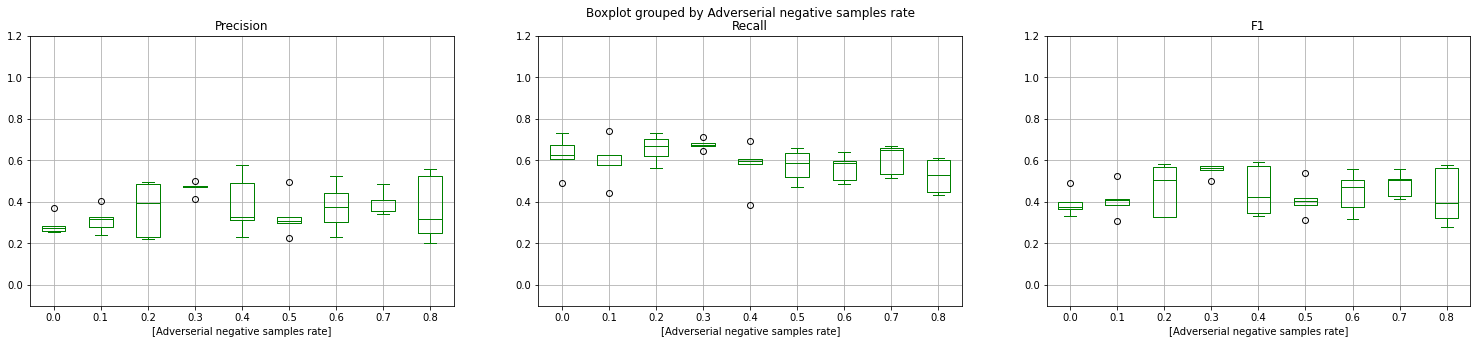

In [8]:
def plot_comparison_box(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAdverserialNegativeRate" : "Adverserial negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }
        ax[0].set_ylim(-0.1,1.2)
        df[["Precision", "TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[0], color="green")

        ax[1].set_ylim(-0.1,1.2)
        df[["Recall","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[1], color="green")

        ax[2].set_ylim(-0.1,1.2)
        df[["F1","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[2], color="green")

       
        #plt.legend()

plot_comparison_box(df_stats)

In [9]:
df_stats.groupby("TrainAdverserialNegative")[["Precision", "Recall", "F1"]].describe().T

TrainAdverserialNegative       0         21        42        63        84   \
Precision count           5.000000  5.000000  5.000000  5.000000  5.000000   
          mean            0.288516  0.313721  0.365667  0.467919  0.386926   
          std             0.047798  0.061341  0.132894  0.033268  0.141286   
          min             0.253292  0.239609  0.222522  0.412104  0.230496   
          25%             0.260788  0.280161  0.230581  0.470464  0.311594   
          50%             0.272300  0.317995  0.394781  0.477035  0.327572   
          75%             0.284902  0.326253  0.486513  0.478873  0.488865   
          max             0.371298  0.404586  0.493936  0.501116  0.576102   
Recall    count           5.000000  5.000000  5.000000  5.000000  5.000000   
          mean            0.626687  0.592804  0.657871  0.676762  0.573313   
          std             0.090441  0.107892  0.066225  0.025676  0.112357   
          min             0.490255  0.440780  0.565217  0.643178  0.386807   
          25%             0.608696  0.575712  0.619190  0.668666  0.584708   
          50%             0.625187  0.580210  0.671664  0.673163  0.596702   
          75%             0.676162  0.626687  0.703148  0.685157  0.607196   
          max             0.733133  0.740630  0.730135  0.713643  0.691154   
F1        count           5.000000  5.000000  5.000000  5.000000  5.000000   
          mean            0.394434  0.409658  0.462755  0.552962  0.452533   
          std             0.060046  0.076336  0.126958  0.029690  0.123425   
          min             0.334014  0.310454  0.327388  0.502342  0.330649   
          25%             0.368049  0.387216  0.327541  0.552322  0.345151   
          50%             0.376274  0.410828  0.505660  0.562462  0.422954   
          75%             0.400889  0.416486  0.569250  0.573149  0.572671   
          max             0.492944  0.523305  0.583933  0.574536  0.591241   

TrainAdverserialNegative       105       126       147       168  
Precision count           5.000000  5.000000  5.000000  5.000000  
          mean            0.329704  0.375579  0.401350  0.371733  
          std             0.099823  0.114083  0.056484  0.161798  
          min             0.225407  0.231507  0.344378  0.204096  
          25%             0.296374  0.304673  0.355511  0.252108  
          50%             0.306350  0.376658  0.409471  0.316592  
          75%             0.325438  0.441309  0.410846  0.525032  
          max             0.494949  0.523747  0.486547  0.560839  
Recall    count           5.000000  5.000000  5.000000  5.000000  
          mean            0.575112  0.563118  0.606597  0.525037  
          std             0.078037  0.063205  0.074787  0.083518  
          min             0.473763  0.488756  0.514243  0.433283  
          25%             0.518741  0.506747  0.536732  0.448276  
          50%             0.587706  0.586207  0.650675  0.529235  
          75%             0.637181  0.595202  0.661169  0.601199  
          max             0.658171  0.638681  0.670165  0.613193  
F1        count           5.000000  5.000000  5.000000  5.000000  
          mean            0.412023  0.445555  0.482426  0.428481  
          std             0.080690  0.097302  0.060579  0.138665  
          min             0.314260  0.317819  0.412508  0.277484  
          25%             0.385836  0.375360  0.427718  0.322720  
          50%             0.404569  0.473860  0.505734  0.396184  
          75%             0.418095  0.503542  0.509402  0.565698  
          max             0.537354  0.557193  0.556767  0.580318

In [10]:
from scipy import stats


 
    
stats.ttest_ind(df_stats.query("TrainAdverserialNegative == 21")["Precision"], 
                df_stats.query("TrainAdverserialNegative == 63")["Precision"])

Ttest_indResult(statistic=-4.941101583931149, pvalue=0.0011334920713266423)

In [22]:
    
stats.ttest_ind(df_stats.query("TrainAdverserialNegative == 0")["Precision"], 
                df_stats.query("TrainAdverserialNegative == 84")["Precision"], alternative="less")

Ttest_indResult(statistic=-1.4753441105698748, pvalue=0.08917844639620919)